# LSTM Modelling for Australian Road Fatalities

In [541]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
import math

from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import Adam

In [542]:
df = pd.read_csv('df_lstm.csv', index_col = 'Unnamed: 0')

In [543]:
df.head()

,month_year
1989-01,228
1989-02,211
1989-03,256
1989-04,188
1989-05,213


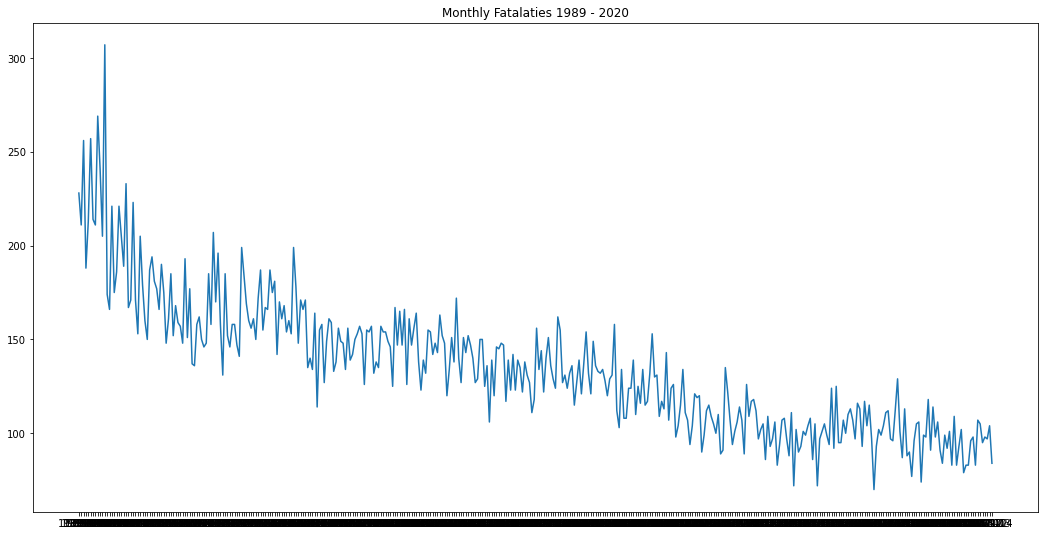

In [544]:
plt.figure(figsize=(18,9))
plt.plot(df.index, df['month_year'], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Monthly Fatalities')
plt.title('Monthly Fatalaties 1989 - 2020', )
plt.show();

# Reshaping data for modelling

In [545]:
data = df.values
print(data.shape)
print(type(data))

(388, 1)
<class 'numpy.ndarray'>


In [546]:
train_data_len = math.ceil(len(data) * 0.75)
print(train_data_len)

291


In [547]:
scaler = MinMaxScaler(feature_range=(0,1))
s_data = scaler.fit_transform(data)
print(s_data.shape)

(388, 1)


In [548]:
s_data

array([[0.66666667],
       [0.59493671],
       [0.78481013],
       [0.4978903 ],
       [0.60337553],
       [0.78902954],
       [0.60759494],
       [0.59493671],
       [0.83966245],
       [0.72151899],
       [0.56962025],
       [1.        ],
       [0.43881857],
       [0.40506329],
       [0.6371308 ],
       [0.44303797],
       [0.48945148],
       [0.6371308 ],
       [0.56962025],
       [0.5021097 ],
       [0.68776371],
       [0.4092827 ],
       [0.42616034],
       [0.64556962],
       [0.42616034],
       [0.35021097],
       [0.56962025],
       [0.45991561],
       [0.37974684],
       [0.33755274],
       [0.49367089],
       [0.52320675],
       [0.46835443],
       [0.45147679],
       [0.40506329],
       [0.50632911],
       [0.44303797],
       [0.32911392],
       [0.38396624],
       [0.48523207],
       [0.34599156],
       [0.41350211],
       [0.37552743],
       [0.36708861],
       [0.32911392],
       [0.51898734],
       [0.34177215],
       [0.451

In [551]:
df['scaled'] = s_data

In [552]:
df.head()

,month_year,scaled
1989-01,228,0.666667
1989-02,211,0.594937
1989-03,256,0.784810
1989-04,188,0.497890
1989-05,213,0.603376


In [553]:
#Create the training data
train_data = s_data[0:train_data_len]

In [554]:
#Split the data: X_train and y_train
X_train = []
y_train = []

for i in range(12, len(train_data)):
    X_train.append(train_data[i-12:i])
    y_train.append(train_data[i])
    if i<=13:
        print(X_train)
        print(y_train)
        print()

[array([[0.66666667],
       [0.59493671],
       [0.78481013],
       [0.4978903 ],
       [0.60337553],
       [0.78902954],
       [0.60759494],
       [0.59493671],
       [0.83966245],
       [0.72151899],
       [0.56962025],
       [1.        ]])]
[array([0.43881857])]

[array([[0.66666667],
       [0.59493671],
       [0.78481013],
       [0.4978903 ],
       [0.60337553],
       [0.78902954],
       [0.60759494],
       [0.59493671],
       [0.83966245],
       [0.72151899],
       [0.56962025],
       [1.        ]]), array([[0.59493671],
       [0.78481013],
       [0.4978903 ],
       [0.60337553],
       [0.78902954],
       [0.60759494],
       [0.59493671],
       [0.83966245],
       [0.72151899],
       [0.56962025],
       [1.        ],
       [0.43881857]])]
[array([0.43881857]), array([0.40506329])]



In [555]:
#Convert training sets to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

In [556]:
X_train.shape

(279, 12, 1)

In [557]:
y_train.shape

(279, 1)

# Building the LSTM Model - Starting with Vanilla (1 layer)

In [558]:
model = Sequential()
model.add(LSTM(50, input_shape= (X_train.shape[1], 1)))
model.add(Dense(25))
model.add(Dense(1))

# Compile the LSTM Model

In [559]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [560]:
#Train the model
model.fit(X_train, y_train, batch_size = 1, epochs=1, verbose=1)

279/279 [==============================] - 1s 5ms/step - loss: 0.0068 - accuracy: 0.0000e+00


In [561]:
#Create the test data
test_data = s_data[train_data_len - 12: 388]

#Create X_test, y_test
X_test = []
y_test = data[train_data_len:]

for i in range(12, len(test_data)):
    X_test.append(test_data[i-12:i])

In [562]:
#Convert to np.array
X_test = np.array(X_test)
print(X_test.shape)

(97, 12, 1)


In [563]:
#Getting predicted values
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

In [564]:
#Using RMSE to estimate accuracy of model
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

0.2750926853455219

In [565]:
score = model.evaluate(X_test, y_test, batch_size = 10)
print(score)

10/10 [==============================] - 0s 4ms/step - loss: 9830.2695 - accuracy: 0.0000e+00
[9830.26953125, 0.0]


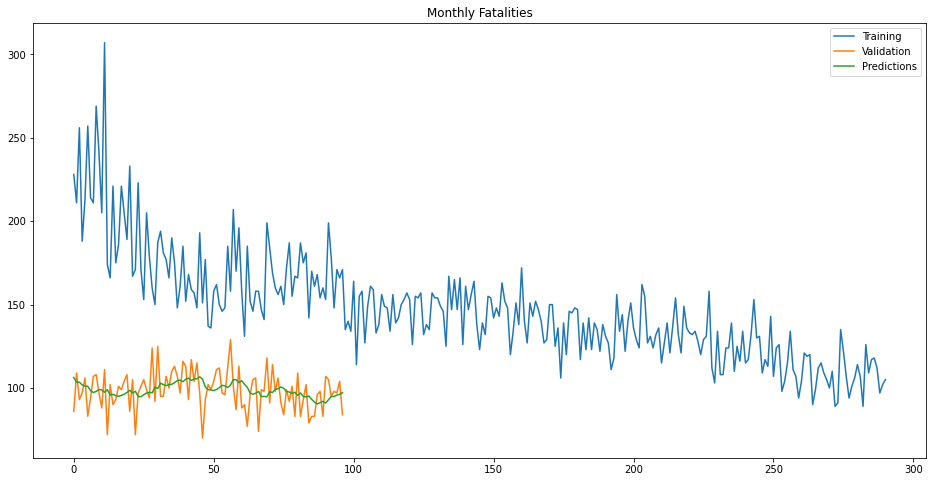

In [566]:
train = data[:train_data_len]
valid = data[train_data_len:]
pred = predictions

plt.figure(figsize=(16,8))
plt.title('Monthly Fatalities')
#plt.xlabel('Date')
#plt.ylabel('Fatality Count')
plt.plot(train)
plt.plot(valid)
plt.plot(pred)
plt.legend(['Training', 'Validation', 'Predictions'], loc='upper right')
plt.show()

### Correcting the plot

In [567]:
len(pred)

97

In [568]:
len(valid)

97

In [569]:
dfpred = df.reset_index()

In [570]:
dfpred.head()

,index,month_year,scaled
0,1989-01,228,0.666667
1,1989-02,211,0.594937
2,1989-03,256,0.784810
3,1989-04,188,0.497890
4,1989-05,213,0.603376


In [571]:
dfpred.shape

(388, 3)

In [572]:
len(predictions)

97

In [573]:
df_pred = dfpred[-97:]

In [574]:
df_pred.head()

,index,month_year,scaled
291,2013-04,86,0.067511
292,2013-05,109,0.164557
293,2013-06,93,0.097046
294,2013-07,97,0.113924
295,2013-08,106,0.151899


In [575]:
df_pred['predictions'] = predictions

<ipython-input-575-b19690b34d3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred['predictions'] = predictions


In [576]:
df_pred.head()

,index,month_year,scaled,predictions
291,2013-04,86,0.067511,106.293785
292,2013-05,109,0.164557,103.389748
293,2013-06,93,0.097046,103.505409
294,2013-07,97,0.113924,101.831253
295,2013-08,106,0.151899,101.118721


In [577]:
df_pred.shape

(97, 4)

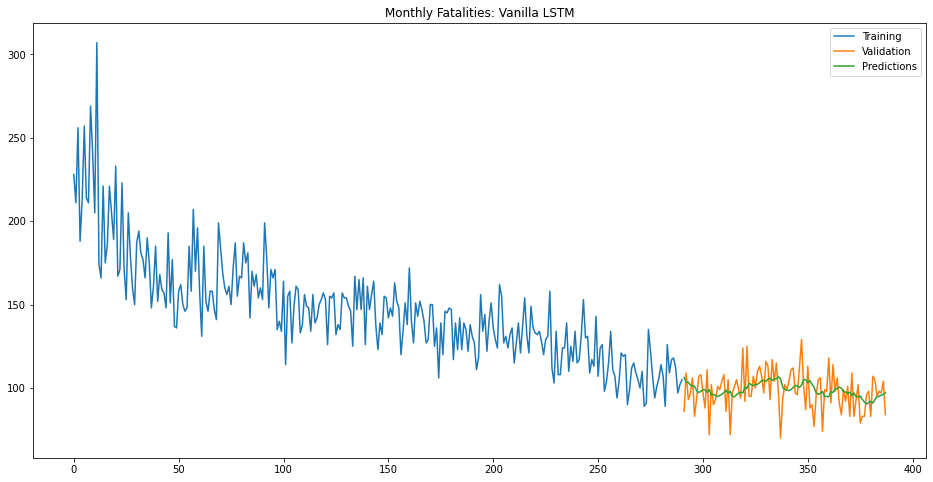

In [578]:
train = data[:train_data_len]
valid = df_pred['month_year']
pred = df_pred['predictions']

plt.figure(figsize=(16,8))
plt.title('Monthly Fatalities: Vanilla LSTM')
#plt.xlabel('Date')
#plt.ylabel('Fatality Count')
plt.plot(train)
plt.plot(valid)
plt.plot(pred)
plt.legend(['Training', 'Validation', 'Predictions'], loc='upper right')
plt.show()

# Adding a Layer to the LSTM

In [579]:
model1 = Sequential()
model1.add(LSTM(50, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model1.add(LSTM(50, return_sequences=False))
model1.add(Dense(25))
model1.add(Dense(1))

In [580]:
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [581]:
model1.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_25 (LSTM)               (None, 12, 50)            10400     
_________________________________________________________________
lstm_26 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_28 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [582]:
model1.fit(X_train, y_train, batch_size = 1, epochs=1, verbose=1)

279/279 [==============================] - 2s 9ms/step - loss: 0.0075 - accuracy: 0.0000e+00


In [583]:
predictions1 = model.predict(X_test)
predictions1 = scaler.inverse_transform(predictions1)

rmse1 = np.sqrt(np.mean(predictions1 - y_test) ** 2)
rmse1

0.2750926853455219

In [584]:
score = model1.evaluate(X_test, y_test)
print(score)

#, batch_size = 10

4/4 [==============================] - 0s 7ms/step - loss: 9828.4658 - accuracy: 0.0000e+00
[9828.4658203125, 0.0]


In [585]:
df_pred['predictions1'] = predictions1

<ipython-input-585-e6575c843f45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred['predictions1'] = predictions1


In [586]:
df_pred.head()

,index,month_year,scaled,predictions,predictions1
291,2013-04,86,0.067511,106.293785,106.293785
292,2013-05,109,0.164557,103.389748,103.389748
293,2013-06,93,0.097046,103.505409,103.505409
294,2013-07,97,0.113924,101.831253,101.831253
295,2013-08,106,0.151899,101.118721,101.118721


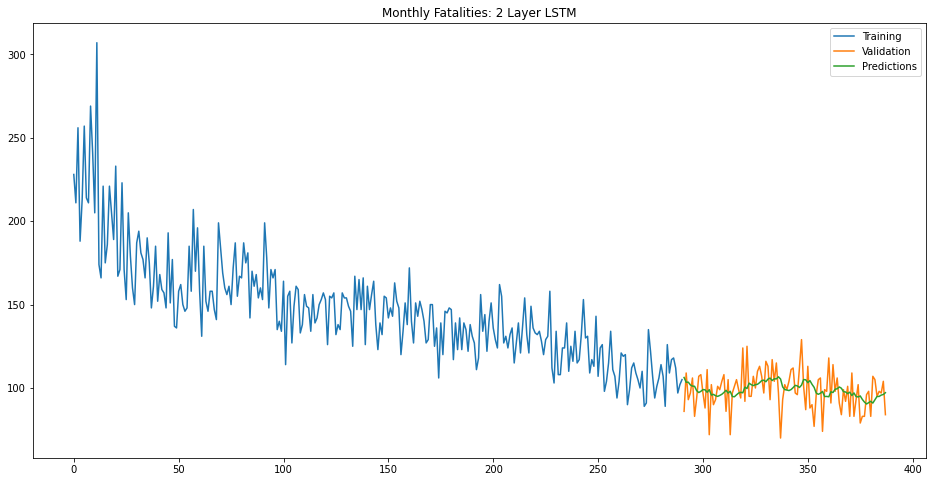

In [587]:
train = data[:train_data_len]
valid = df_pred['month_year']
pred1 = df_pred['predictions1']

plt.figure(figsize=(16,8))
plt.title('Monthly Fatalities: 2 Layer LSTM')
#plt.xlabel('Date')
#plt.ylabel('Fatality Count')
plt.plot(train)
plt.plot(valid)
plt.plot(pred1)
plt.legend(['Training', 'Validation', 'Predictions'], loc='upper right')
plt.show()

# Trying to look back further - 24/48 months

In [588]:
len(train_data)

291

In [661]:
X_train_24 = []
y_train_24 = []

for i in range(24, len(train_data)):
    X_train_24.append(train_data[i-24:i])
    y_train_24.append(train_data[i])
    if i<=24:
        print(X_train_24)
        print(y_train_24)
        print()

[array([[0.66666667],
       [0.59493671],
       [0.78481013],
       [0.4978903 ],
       [0.60337553],
       [0.78902954],
       [0.60759494],
       [0.59493671],
       [0.83966245],
       [0.72151899],
       [0.56962025],
       [1.        ],
       [0.43881857],
       [0.40506329],
       [0.6371308 ],
       [0.44303797],
       [0.48945148],
       [0.6371308 ],
       [0.56962025],
       [0.5021097 ],
       [0.68776371],
       [0.4092827 ],
       [0.42616034],
       [0.64556962]])]
[array([0.42616034])]



In [662]:
len(X_train_24)

267

In [663]:
len(y_train_24)

267

In [664]:
X_train_24, y_train_24 = np.array(X_train_24), np.array(y_train_24)

In [665]:
print(X_train_24.shape)
print(y_train_24.shape)

(267, 24, 1)
(267, 1)


In [594]:
model_24 = Sequential()
model_24.add(LSTM(50, return_sequences=True, input_shape= (X_train_24.shape[1], 1)))
model_24.add(LSTM(50, return_sequences=False))
model_24.add(Dense(25))
model_24.add(Dense(1))

In [595]:
model_24.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [596]:
model_24.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_27 (LSTM)               (None, 24, 50)            10400     
_________________________________________________________________
lstm_28 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_30 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [597]:
model_24.fit(X_train, y_train, batch_size = 1, epochs=10, verbose=1)

Epoch 1/10
279/279 [==============================] - 2s 9ms/step - loss: 0.0075 - accuracy: 0.0000e+00
Epoch 2/10
279/279 [==============================] - 3s 9ms/step - loss: 0.0055 - accuracy: 0.0000e+00
Epoch 3/10
279/279 [==============================] - 3s 10ms/step - loss: 0.0053 - accuracy: 0.0000e+00
Epoch 4/10
279/279 [==============================] - 3s 10ms/step - loss: 0.0057 - accuracy: 0.0000e+00
Epoch 5/10
279/279 [==============================] - 3s 9ms/step - loss: 0.0052 - accuracy: 0.0000e+00
Epoch 6/10
279/279 [==============================] - 3s 9ms/step - loss: 0.0054 - accuracy: 0.0000e+00
Epoch 7/10
279/279 [==============================] - 3s 10ms/step - loss: 0.0054 - accuracy: 0.0000e+00
Epoch 8/10
279/279 [==============================] - 3s 9ms/step - loss: 0.0052 - accuracy: 0.0000e+00
Epoch 9/10
279/279 [==============================] - 3s 10ms/step - loss: 0.0052 - accuracy: 0.0000e+00
Epoch 10/10
279/279 [==============================] - 3s 10

In [598]:
test_data_24 = s_data[train_data_len - 24: 376]

#Create X_test, y_test
X_test_24 = []
y_test_24 = data[train_data_len:376]

for i in range(24, len(test_data_24)):
    X_test_24.append(test_data[i-24:i, 0])

In [599]:
train_data_len

291

In [600]:
X_test_24 = np.array(X_test_24)
print(X_test_24.shape)

(85, 24)


In [601]:
X_test_24 = np.reshape(X_test_24, (X_test_24.shape[0], X_test_24.shape[1], 1))

In [630]:
X_test_24.shape

(85, 24, 1)

In [602]:
#Getting predicted values
predictions_24 = model_24.predict(X_test_24)
predictions_24 = scaler.inverse_transform(predictions_24)

rmse_24 = np.sqrt(np.mean(predictions_24 - y_test_24) ** 2)
rmse_24

3.0357746797449447

In [603]:
score_24 = model_24.evaluate(X_test_24, y_test_24)
print(score_24)

3/3 [==============================] - 0s 14ms/step - loss: 9949.3623 - accuracy: 0.0000e+00
[9949.3623046875, 0.0]


In [604]:
df_pred_24 = df.reset_index()

In [605]:
df_pred_24 = dfpred[-97:]

In [606]:
df_pred_24

,index,month_year,scaled
291,2013-04,86,0.067511
292,2013-05,109,0.164557
293,2013-06,93,0.097046
294,2013-07,97,0.113924
295,2013-08,106,0.151899
...,...,...,...
383,2020-12,95,0.105485
384,2021-01,98,0.118143
385,2021-02,97,0.113924
386,2021-03,104,0.143460


In [607]:
df_pred_24 = df_pred[-97:-12]

In [608]:
df_pred_24['predictions_24'] = predictions_24

<ipython-input-608-c8bd8bd1eea1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred_24['predictions_24'] = predictions_24


In [609]:
df_pred_24.head(20)

,index,month_year,scaled,predictions,predictions1,predictions_24
291,2013-04,86,0.067511,106.293785,106.293785,103.809319
292,2013-05,109,0.164557,103.389748,103.389748,102.259209
293,2013-06,93,0.097046,103.505409,103.505409,101.287537
294,2013-07,97,0.113924,101.831253,101.831253,100.179993
295,2013-08,106,0.151899,101.118721,101.118721,99.230545
296,2013-09,83,0.054852,101.025871,101.025871,98.591476
297,2013-10,94,0.101266,98.405724,98.405724,98.325493
298,2013-11,107,0.156118,97.260368,97.260368,98.486465
299,2013-12,108,0.160338,97.997421,97.997421,99.177696
300,2014-01,97,0.113924,99.047272,99.047272,99.110962


In [610]:
rmse_24 = np.sqrt(np.mean(predictions_24 - y_test_24) ** 2)
rmse_24

3.0357746797449447

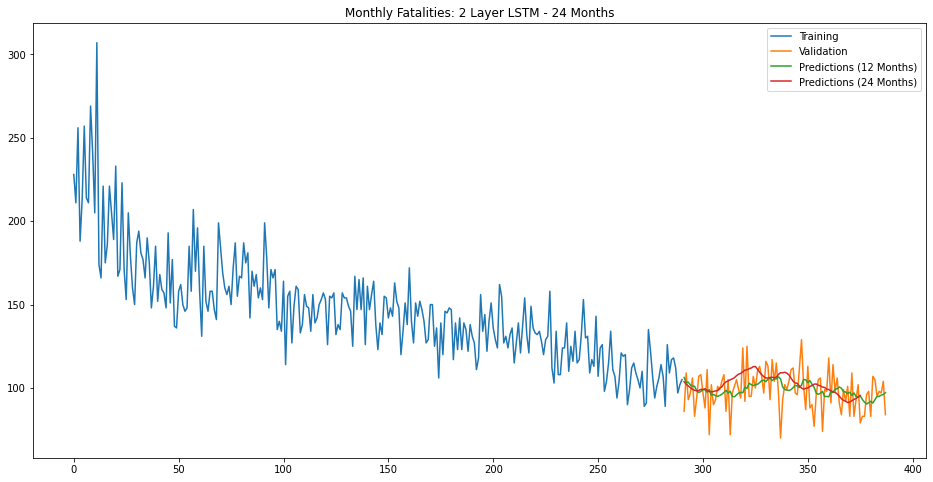

In [611]:
train = data[:train_data_len]
valid = df_pred['month_year']
pred = df_pred['predictions']
pred_24 = df_pred_24['predictions_24']

plt.figure(figsize=(16,8))
plt.title('Monthly Fatalities: 2 Layer LSTM - 24 Months')
#plt.xlabel('Date')
#plt.ylabel('Fatality Count')
plt.plot(train)
plt.plot(valid)
plt.plot(pred)
plt.plot(pred_24)
plt.legend(['Training', 'Validation', 'Predictions (12 Months)', 'Predictions (24 Months)'], loc='upper right')
plt.show()

# 48 months

In [612]:
X_train_48 = []
y_train_48 = []

months = 48

for i in range(months, len(train_data)):
    X_train_48.append(train_data[i-months:i])
    y_train_48.append(train_data[i])
    
X_train_48, y_train_48 =np.array(X_train_48),np.array(y_train_48)

print(X_train_48.shape)
print(y_train_48.shape)

(243, 48, 1)
(243, 1)


In [666]:
model_48 = Sequential()
model_48.add(LSTM(50, return_sequences=True, input_shape= (X_train_48.shape[1], 1)))
model_48.add(LSTM(50, return_sequences=False))
model_48.add(Dense(25))
model_48.add(Dense(1))

print(model_48.summary())

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_39 (LSTM)               (None, 48, 50)            10400     
_________________________________________________________________
lstm_40 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_42 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________
None


In [667]:
model_48.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [668]:
model_48.fit(X_train, y_train, batch_size = 1, epochs=10, verbose=1)

Epoch 1/10
279/279 [==============================] - 2s 9ms/step - loss: 0.0094 - accuracy: 0.0000e+00
Epoch 2/10
279/279 [==============================] - 2s 9ms/step - loss: 0.0061 - accuracy: 0.0000e+00
Epoch 3/10
279/279 [==============================] - 3s 9ms/step - loss: 0.0060 - accuracy: 0.0000e+00
Epoch 4/10
279/279 [==============================] - 3s 10ms/step - loss: 0.0055 - accuracy: 0.0000e+00 0s - loss: 0
Epoch 5/10
279/279 [==============================] - 3s 11ms/step - loss: 0.0052 - accuracy: 0.0000e+00
Epoch 6/10
279/279 [==============================] - 3s 11ms/step - loss: 0.0055 - accuracy: 0.0000e+00 3s - loss: 0.0087 - accura
Epoch 7/10
279/279 [==============================] - 3s 10ms/step - loss: 0.0060 - accuracy: 0.0000e+00
Epoch 8/10
279/279 [==============================] - 3s 10ms/step - loss: 0.0053 - accuracy: 0.0000e+00
Epoch 9/10
279/279 [==============================] - 3s 10ms/step - loss: 0.0051 - accuracy: 0.0000e+00
Epoch 10/10
279/27

In [669]:
test_data_48 = s_data[train_data_len - 48: 352]

#Create X_test, y_test
X_test_48 = []
y_test_48 = data[train_data_len:352]

for i in range(48, len(test_data_48)):
    X_test_48.append(test_data[i-48:i, 0])

In [670]:
X_test_48 = np.array(X_test_48)
print(X_test_48.shape)

(61, 48)


In [672]:
X_test_48 = np.reshape(X_test_48, (X_test_48.shape[0], X_test_48.shape[1], 1))
X_test_48.shape

(61, 48, 1)

In [673]:
predictions_48 = model_48.predict(X_test_48)
predictions_48 = scaler.inverse_transform(predictions_48)

rmse_48 = np.sqrt(np.mean(predictions_48 - y_test_48) ** 2)
rmse_48

2.989961217661373

In [674]:
score_48 = model_48.evaluate(X_test_48, y_test_48)
print(score_48)

2/2 [==============================] - 0s 26ms/step - loss: 10252.2148 - accuracy: 0.0000e+00
[10252.21484375, 0.0]


In [678]:
df_pred_48 = df_pred[-97:-36]
df_pred_48.shape

(61, 5)

In [679]:
df_pred_48['predictions_48'] = predictions_48

<ipython-input-679-7e38c7624d74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred_48['predictions_48'] = predictions_48


In [680]:
df_pred_48

,index,month_year,scaled,predictions,predictions1,predictions_48
291,2013-04,86,0.067511,106.293785,106.293785,100.647179
292,2013-05,109,0.164557,103.389748,103.389748,101.623154
293,2013-06,93,0.097046,103.505409,103.505409,102.515190
294,2013-07,97,0.113924,101.831253,101.831253,102.894905
295,2013-08,106,0.151899,101.118721,101.118721,103.690964
...,...,...,...,...,...,...
347,2017-12,129,0.248945,101.710464,101.710464,88.504135
348,2018-01,101,0.130802,105.047516,105.047516,89.125793
349,2018-02,87,0.071730,104.906639,104.906639,89.799294
350,2018-03,113,0.181435,103.221786,103.221786,90.439453


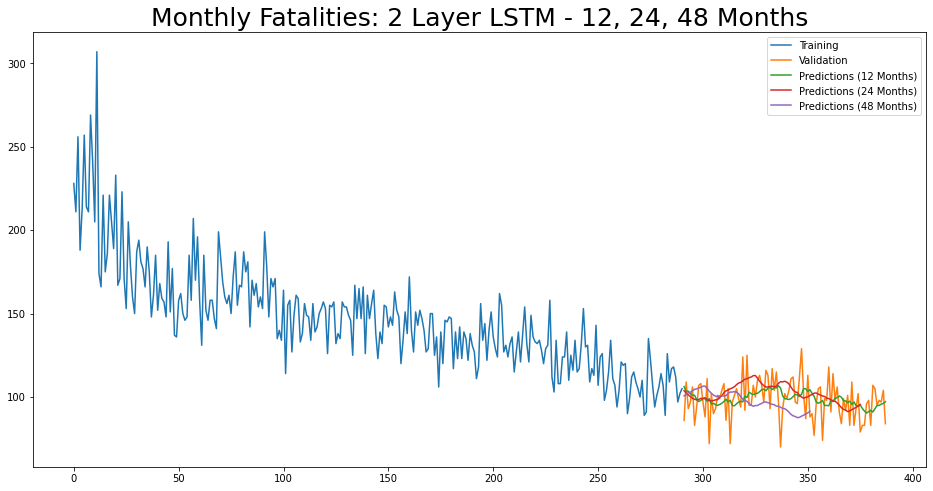

<Figure size 432x288 with 0 Axes>

In [682]:
train = data[:train_data_len]
valid = df_pred['month_year']
pred = df_pred['predictions']
pred_24 = df_pred_24['predictions_24']
pred_48 = df_pred_48['predictions_48']

plt.figure(figsize=(16,8))
plt.title('Monthly Fatalities: 2 Layer LSTM - 12, 24, 48 Months', fontdict = {'fontsize': 25})
#plt.xlabel('Month')
#plt.ylabel('Fatality Count')
plt.plot(train)
plt.plot(valid)
plt.plot(pred)
plt.plot(pred_24)
plt.plot(pred_48)
plt.legend(['Training', 'Validation', 'Predictions (12 Months)', 'Predictions (24 Months)', 'Predictions (48 Months)'], loc='upper right')
plt.show()
#fig = plt.gcf()
#fig.savefig('Monthly Fatalaties - Validating LSTM_final.png', bbox_inches='tight')